In [1]:
import random

import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
leagueTable = call_api('http://api.football-data.org/v1/competitions/445/leagueTable', 'standing')

In [5]:
team_for_pd = []
for team in leagueTable:
    squadMarketValue = call_api(team['_links']['team']['href'], 'squadMarketValue')
    if squadMarketValue == None:
        squadMarketValue = random.randint(100000, 400000)
    team_for_pd.append({'losses': team['losses'], 'squadMarketValue': squadMarketValue})    

In [6]:
teams_pd = pd.DataFrame(team_for_pd)


In [11]:
whitened = whiten(teams_pd.as_matrix())

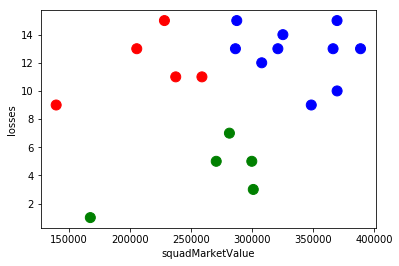

In [17]:
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)

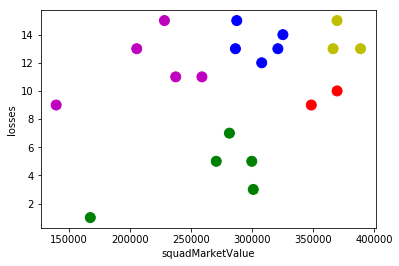

In [18]:
centroids, cluster_map = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)